In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import uncertainties
import matplotlib
# %matplotlib notebook

In [3]:
directory = "./Trap13"
for n in range(5000):
    im = Image.open(f"{directory}/image_{n:05d}.png")
#     plt.imshow(im)
#     plt.xlim(140, 220)
#     plt.ylim(160,240)
#     plt.show()
#     im.crop((125,125,175,175)).save(f"{directory}_prossessed/image_{n:05d}.png")
    im.crop((150,150,225,225)).save(f"{directory}_prossessed/image_{n:05d}.png")

FileNotFoundError: [Errno 2] No such file or directory: './Trap13/image_00000.png'

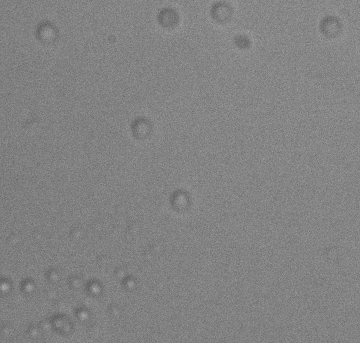

In [79]:
Image.open(f"{directory}/image_{300:05d}.png").crop

In [20]:
import cv2
images = []#list of cv2 image obj
video = cv2.VideoWriter("test.AVI", cv2.VideoWriter_fourcc(*'XVID'), 24, (1200,800))
for n in range(1000):
    im = Image.open(f"{directory}/image_{n:05d}.png")
    video.write(np.asarray(im))

In [ ]:
df = pd.read_csv('data_22xy.csv')
df['error']

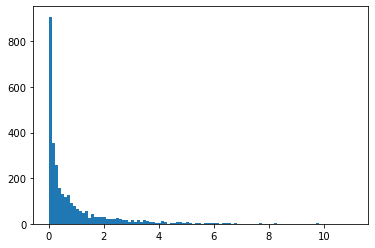

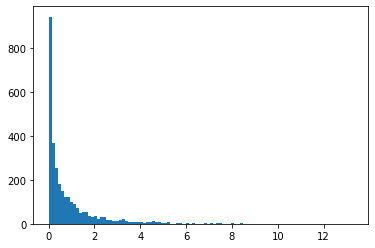

In [14]:
# xlin = np.arange(0,1000)
# plt.errorbar(xlin, df['# x'],yerr=df['error'], fmt='.')
# plt.show()
# plt.errorbar(xlin, df['y'],yerr=df['error'], fmt='.')
# plt.show()

plt.hist((df["# x"]-np.mean(df["# x"]))**2, bins=100)
# plt.xlim(0,10)
# plt.ylim(0, 300)
plt.show()

plt.hist((df["y"]-np.mean(df["y"]))**2, bins=100)
# plt.xlim(0,10)
# plt.ylim(0, 100)
plt.show()

<Figure size 432x288 with 0 Axes>

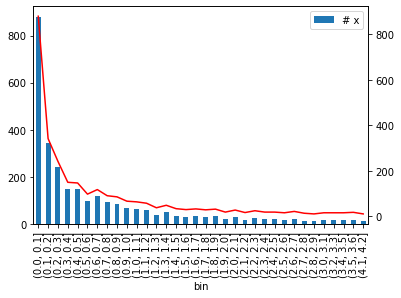

In [138]:
df['bin'] = pd.cut((df["# x"]-np.mean(df["# x"]))**2,
       bins = np.arange(0,13, 0.1).tolist(), )

df1 = pd.pivot_table(data = df, index = 'bin', values = '# x', aggfunc = 'count')
df1 = df1[df1['# x']>10]

fig = plt.figure()
ax1 = df1.plot(kind='bar')
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), df1['# x'], linestyle="-", color = 'r')
# df1.plot(kind='line')
df1.rename(columns={'# x': "x"}, inplace=True)

In [421]:
np.max(df["# x"])

25.51

<Figure size 432x288 with 0 Axes>

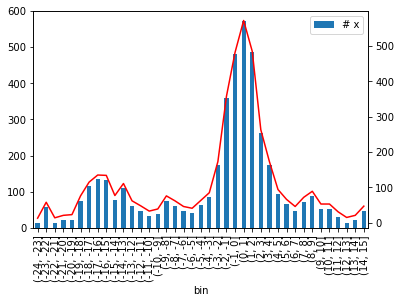

In [436]:
df['bin'] = pd.cut(df["# x"], bins = np.arange(-25,16, 1).tolist())

df1 = pd.pivot_table(data = df, index = 'bin', values = '# x', aggfunc = 'count')
df1 = df1[df1['# x']>10]

fig = plt.figure()
ax1 = df1.plot(kind='bar')
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), df1['# x'], linestyle="-", color = 'r')
# df1.plot(kind='line')
df1.rename(columns={'# x': "x"}, inplace=True)

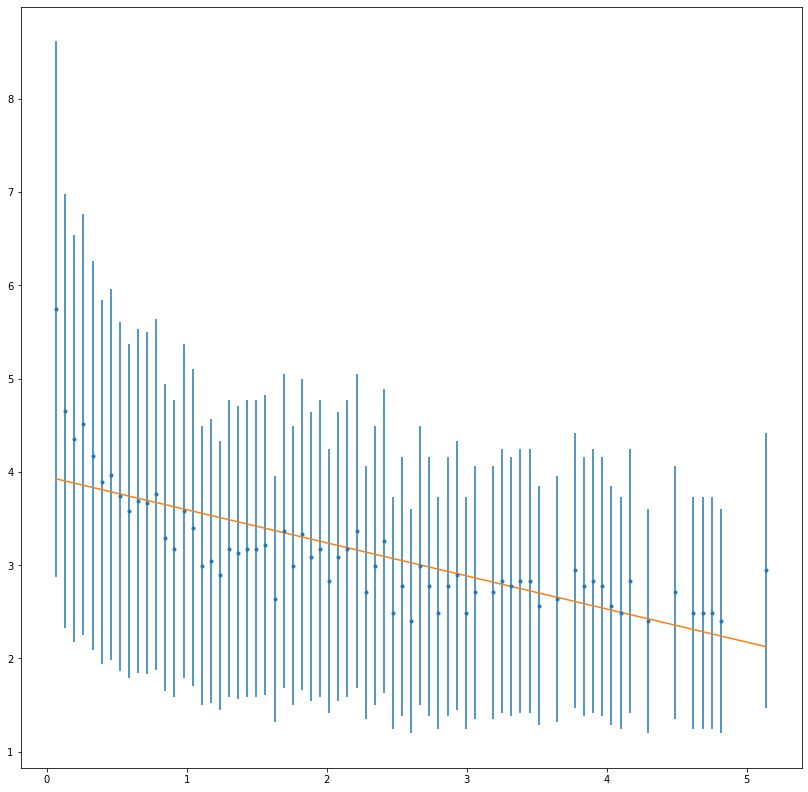

fit: -0.35(x)^2 + 3.95


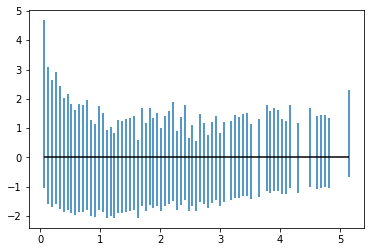

In [435]:
hisx = np.histogram((df["# x"]-np.mean(df["# x"]))**2, bins=10000)
# print(his[1])
hisx = np.concatenate(([hisx[1][1:]], [hisx[0]]), axis=0)
dfx = pd.DataFrame(hisx.transpose(),columns=('bins', 'x^2'))
dfx = dfx[dfx['x^2']>10]
dfx['error'] = np.sqrt(dfx['x^2'])
dfx['2logx'] = np.log(dfx['x^2'])
dfx['2logx_err'] = np.log(dfx['error'])

fit = np.polyfit(dfx['bins'][1:], dfx['2logx'][1:], 1, w = dfx['2logx_err'][1:])
x = np.linspace(np.min(dfx['bins']), np.max(dfx['bins']), 1000)

plt.figure(figsize=(14,14))
plt.errorbar(dfx['bins'], dfx['2logx'], yerr=dfx['2logx_err'], marker='.', linestyle ='none')
plt.plot(x, fit[0]*x + fit[1])
plt.show()
print(f"fit: {fit[0]:.2f}(x)^2 + {fit[1]:.2f}")

plt.errorbar(dfx['bins'], dfx['2logx'] - (fit[0]*dfx['bins'] + fit[1]), yerr=dfx['2logx_err'], linestyle ='none')
plt.hlines(0, np.min(dfx['bins']), np.max(dfx['bins']), color = 'black')
plt.show()

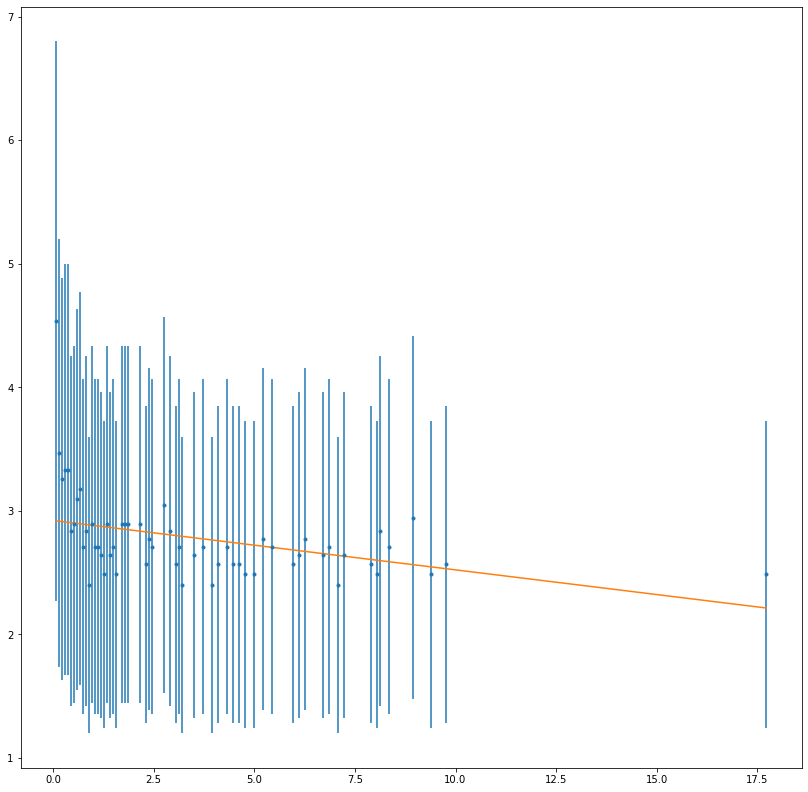

fit: -0.04(y)^2 + 2.92


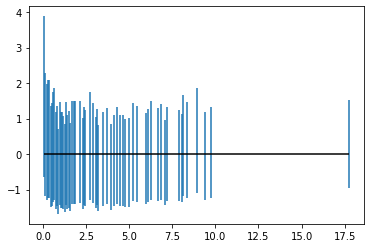

In [411]:
hisy = np.histogram((df["y"]-np.mean(df["y"]))**2, bins=10000)
# print(his[1])
hisy = np.concatenate(([hisy[1][1:]], [hisy[0]]), axis=0)
dfy = pd.DataFrame(hisy.transpose(),columns=('bins', 'x^2'))
dfy = dfy[dfy['x^2']>10]
dfy['error'] = np.sqrt(dfy['x^2'])
dfy['2logx'] = np.log(dfy['x^2'])
dfy['2logx_err'] = np.log(dfy['error'])

fit = np.polyfit(dfy['bins'][1:], dfy['2logx'][1:], 1, w = dfy['2logx_err'][1:])
x = np.linspace(np.min(dfy['bins']), np.max(dfy['bins']), 1000)

plt.figure(figsize=(14,14))
plt.errorbar(dfy['bins'], dfy['2logx'], yerr=dfy['2logx_err'], marker='.', linestyle ='none')
plt.plot(x, fit[0]*x + fit[1])
plt.show()
print(f"fit: {fit[0]:.2f}(y)^2 + {fit[1]:.2f}")

plt.errorbar(dfy['bins'], dfy['2logx'] - (fit[0]*dfy['bins'] + fit[1]), yerr=dfy['2logx_err'], linestyle ='none')
plt.hlines(0, np.min(dfy['bins']), np.max(dfy['bins']), color = 'black')
plt.show()

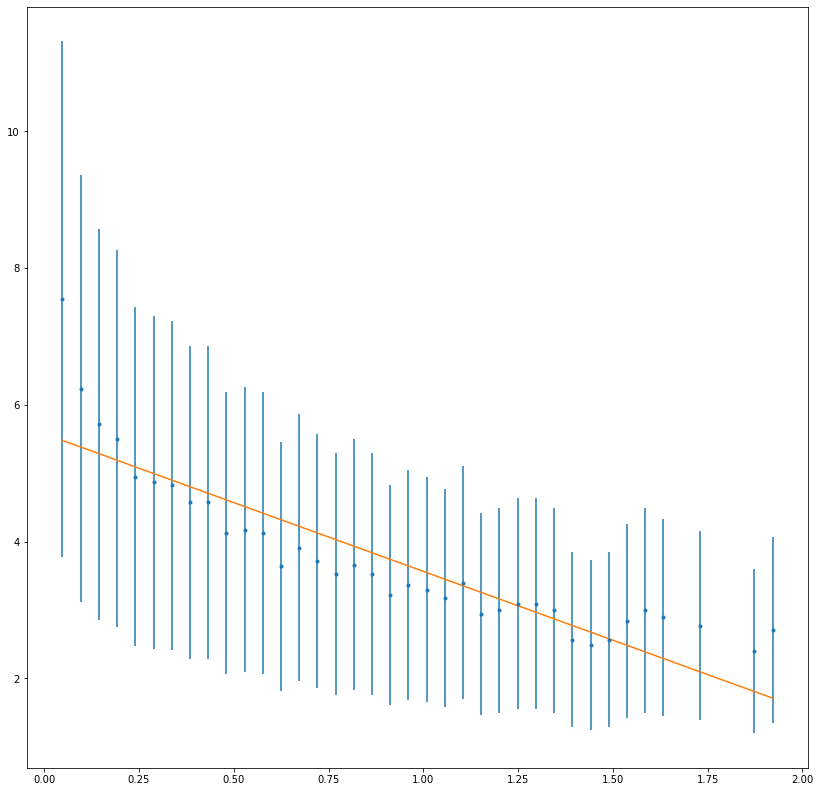

fit: -2.01(v_x)^2 + 5.58


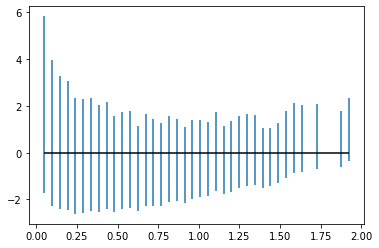

In [412]:
velx = df['# x'][1:].reset_index(drop=True)-df['# x'][0:-1]
hisx = np.histogram((velx-np.mean(velx))**2, bins=50000)
hisx = np.concatenate(([hisx[1][1:]], [hisx[0]]), axis=0)

dfx = pd.DataFrame(hisx.transpose(),columns=('bins', 'x^2'))
dfx = dfx[dfx['x^2']>10]
dfx['error'] = np.sqrt(dfx['x^2'])
dfx['2logx'] = np.log(dfx['x^2'])
dfx['2logx_err'] = np.log(dfx['error'])

fit = np.polyfit(dfx['bins'][1:], dfx['2logx'][1:], 1, w = dfx['2logx_err'][1:])
x = np.linspace(np.min(dfx['bins']), np.max(dfx['bins']), 1000)

plt.figure(figsize=(14,14))
plt.errorbar(dfx['bins'], dfx['2logx'], yerr=dfx['2logx_err'], marker='.', linestyle ='none')
plt.plot(x, fit[0]*x + fit[1])
plt.show()
print(f"fit: {fit[0]:.2f}(v_x)^2 + {fit[1]:.2f}")

plt.errorbar(dfx['bins'], dfx['2logx'] - (fit[0]*dfx['bins'] + fit[1]), yerr=dfx['2logx_err'], linestyle ='none')
plt.hlines(0, np.min(dfx['bins']), np.max(dfx['bins']), color = 'black')
plt.show()

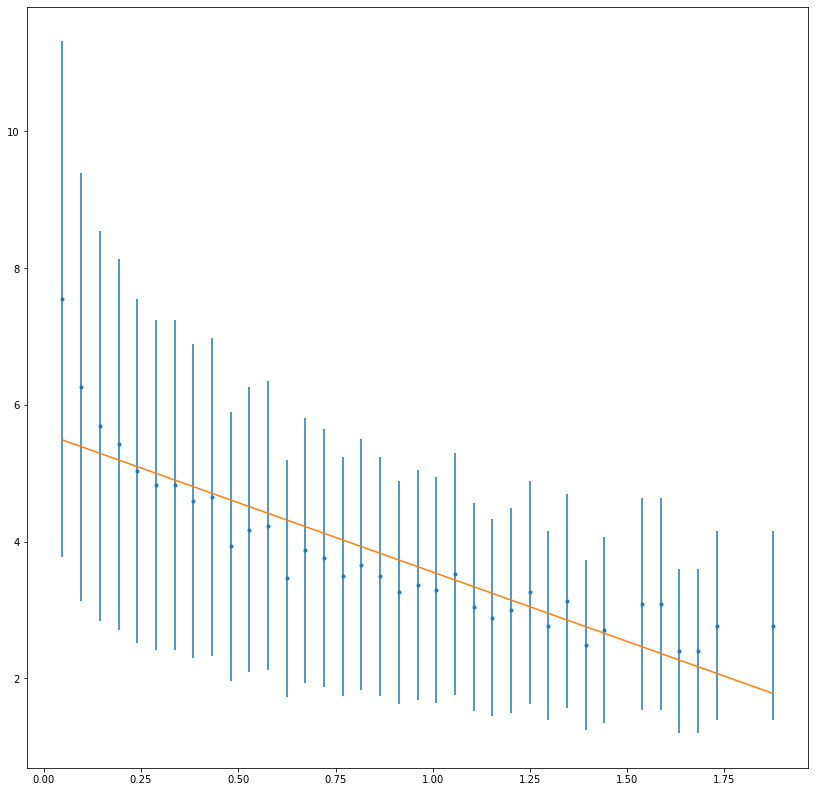

fit: -2.03(v_y)^2 + 5.59


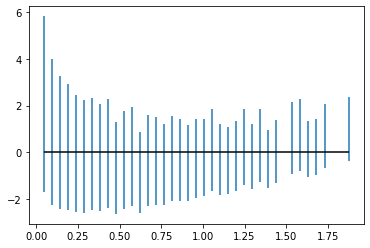

In [413]:
vely = df['y'][1:].reset_index(drop=True)-df['y'][0:-1]
hisy = np.histogram((velx-np.mean(vely))**2, bins=50000)
hisy = np.concatenate(([hisy[1][1:]], [hisy[0]]), axis=0)


dfy = pd.DataFrame(hisy.transpose(),columns=('bins', 'x^2'))
dfy = dfy[dfy['x^2']>10]
dfy['error'] = np.sqrt(dfy['x^2'])
dfy['2logx'] = np.log(dfy['x^2'])
dfy['2logx_err'] = np.log(dfy['error'])

fit = np.polyfit(dfy['bins'][1:], dfy['2logx'][1:], 1, w = dfy['2logx_err'][1:])
x = np.linspace(np.min(dfy['bins']), np.max(dfy['bins']), 1000)


plt.figure(figsize=(14,14))
plt.errorbar(dfy['bins'], dfy['2logx'], yerr=dfy['2logx_err'], marker='.', linestyle ='none')
plt.plot(x, fit[0]*x + fit[1])
plt.show()
print(f"fit: {fit[0]:.2f}(v_y)^2 + {fit[1]:.2f}")

plt.errorbar(dfy['bins'], dfy['2logx'] - (fit[0]*dfy['bins'] + fit[1]), yerr=dfy['2logx_err'], linestyle ='none')
plt.hlines(0, np.min(dfy['bins']), np.max(dfy['bins']), color = 'black')
plt.show()

(-1e-06, 1e-06)

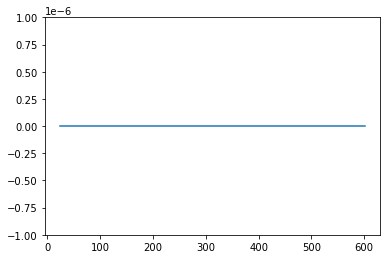

In [386]:
plt.plot(dfy['bins'], dfy['x^2'] - dfx['x^2'])
plt.ylim(-0.000001, 0.000001)

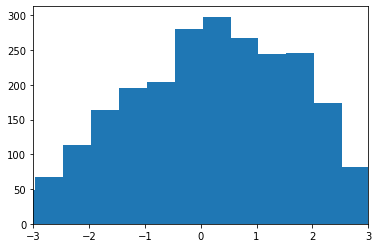

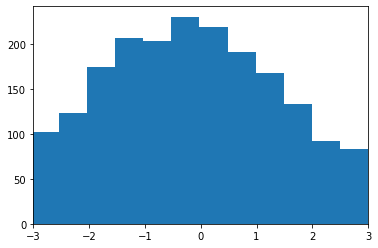

In [427]:
plt.hist((df["# x"]), bins=100)
plt.xlim(-3,3)
plt.show()

plt.hist(df["y"], bins=100)
plt.xlim(-3,3)
plt.show()

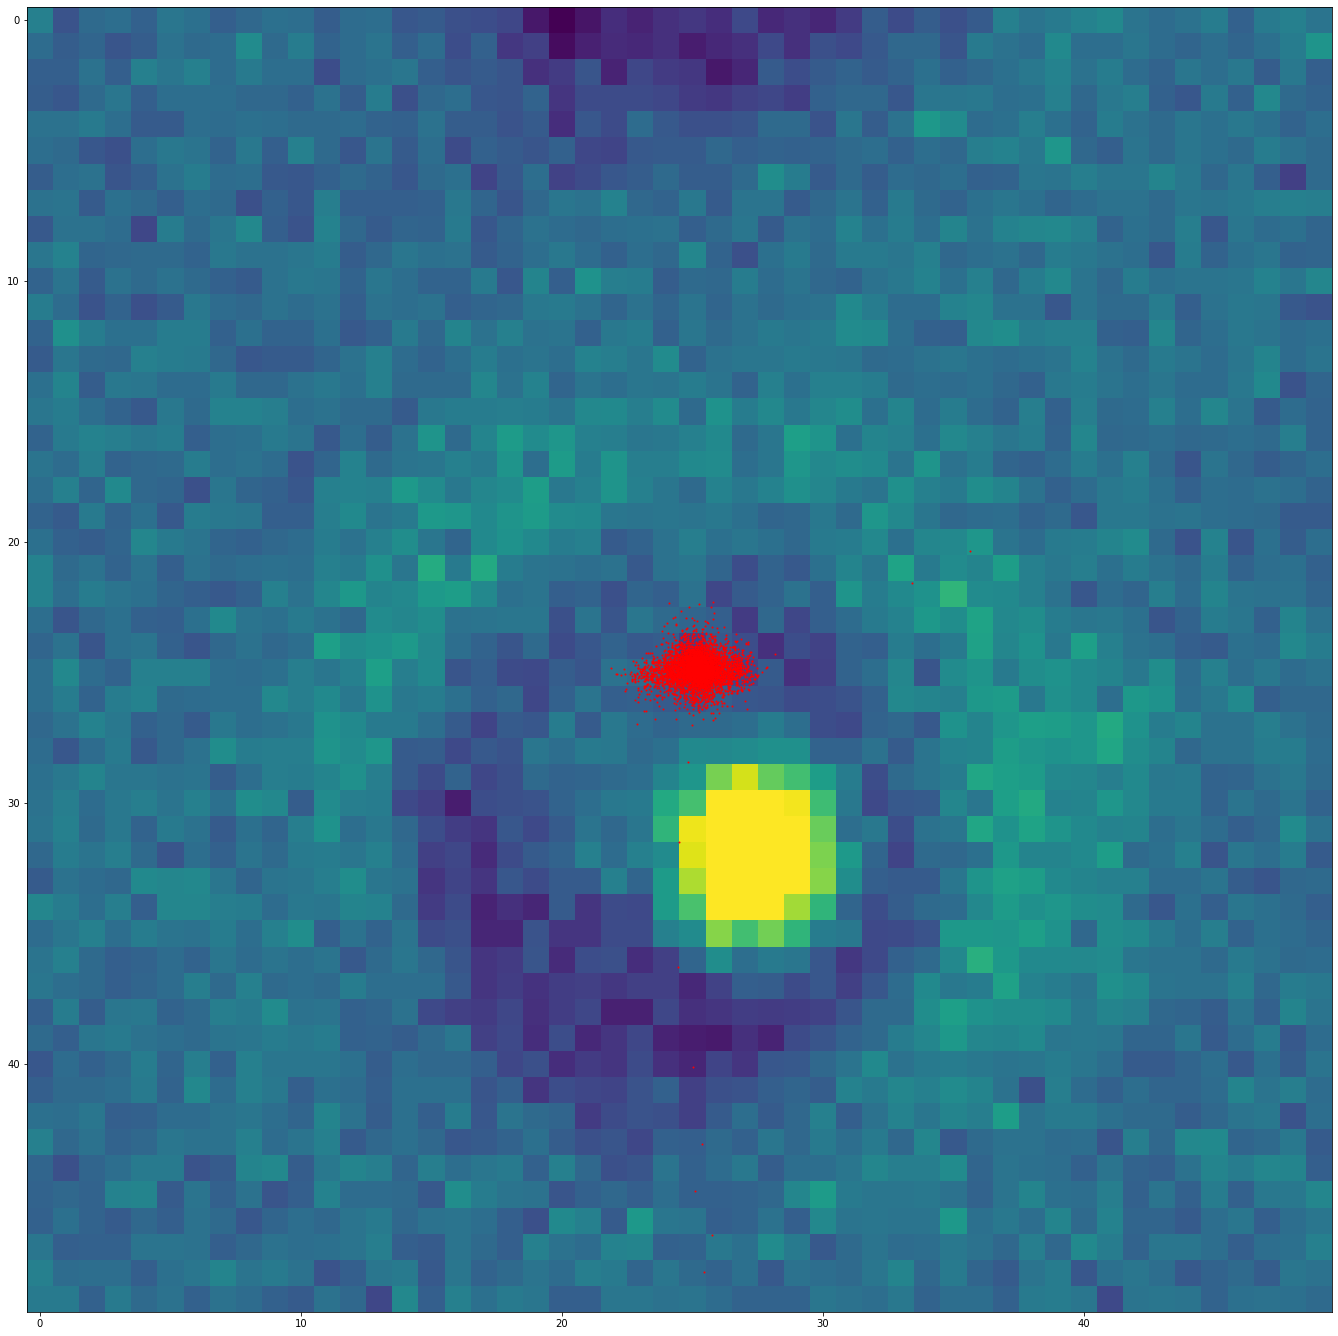

In [118]:
plt.figure(figsize=(24,24))
im = Image.open('./Trap23_prossessed/image_04000.PNG')
width, height = im.size
plt.imshow(im)
plt.scatter(df['# x']+width/2, df['y']+height/2, s=1, c='r')